In [33]:
import pickle


with open('quality_db.pkl', 'rb') as f:
    data = pickle.load(f)
    ids = list(data.keys()) 
    
data[ids[0]]

{'quality': OrderedDict([('Aggregated Quality', 'Bad'),
              ('Raw Occupancy', 'Bad'),
              ('Cluster Occupancy', 'Bad'),
              ('Aggregated Track Quality', 'Bad'),
              ('Aggregated PID Quality', 'Bad')]),
 'metadata': {'path': 'qc/TPC/MO/Q_O_physics/QualitySummary',
  'createTime': 1701173109641,
  'lastModified': 1717580508443,
  'Created': 1701173109641,
  'Last-Modified': 1717580508443,
  'id': '608558c5-8de6-11ee-aec8-0aa1440ea1a2',
  'validFrom': 1701172777801,
  'validUntil': 1701173039594,
  'initialValidity': 1701173039594,
  'MD5': '1bed0e73ee1f23a3b3eaff1bd08f3e48',
  'fileName': 'TObject_1701173109640.root',
  'contentType': 'application/octet-stream',
  'size': 5120,
  'ETag': '"608558c5-8de6-11ee-aec8-0aa1440ea1a2"',
  'Valid-From': 1701172777801,
  'Valid-Until': 1701173039594,
  'InitialValidityLimit': 1701173039594,
  'Content-MD5': '1bed0e73ee1f23a3b3eaff1bd08f3e48',
  'Content-Disposition': 'inline;filename="TObject_1701173109640.r

In [34]:
import pickle
from collections import defaultdict, Counter

# Load DB
with open("quality_db.pkl", "rb") as f:
    db = pickle.load(f)

# Count occurrences per metric
counts = defaultdict(Counter)

for run, record in db.items():
    quality_dict = record.get("quality", {})
    for metric, status in quality_dict.items():
        counts[metric][status] += 1

# Example: print summary
for metric, counter in counts.items():
    print(metric, dict(counter))


Aggregated Quality {'Bad': 294, 'Null': 2, 'Medium': 43, 'Good': 122, 'quality missing!': 1}
Raw Occupancy {'Bad': 20, 'Good': 360, 'quality missing!': 11}
Cluster Occupancy {'Bad': 60, 'Good': 320, 'quality missing!': 11}
Aggregated Track Quality {'Bad': 175, 'quality missing!': 10, 'Medium': 68, 'Good': 138}
Aggregated PID Quality {'Bad': 234, 'quality missing!': 12, 'Medium': 24, 'Good': 121}
Vdrift trend {'Good': 19, 'quality missing!': 1}
Aggregated TPC quality {'Good': 3897, 'Bad': 1713, 'Medium': 1546, 'Null': 52}
Raw occupancy quality {'Good': 5941, 'Bad': 175, 'quality missing!': 1092}
Cluster occupancy quality {'Good': 6054, 'Bad': 287, 'quality missing!': 867}
Aggregated Track quality {'Good': 81, 'Bad': 3, 'Medium': 1}
Aggregated tracks per sector quality {'Good': 83, 'Bad': 1, 'quality missing!': 1}
Aggregated PID quality {'Good': 5840, 'Bad': 827, 'quality missing!': 482, 'Medium': 59}
Aggregated IDC quality {'Good': 3276, 'quality missing!': 427, 'Bad': 62, 'Medium': 9, 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to dataframe
records = []
for metric, counter in counts.items():
    for status, n in counter.items():
        records.append({"Metric": metric, "Status": status, "Count": n})

df = pd.DataFrame(records)


<Figure size 1000x600 with 0 Axes>

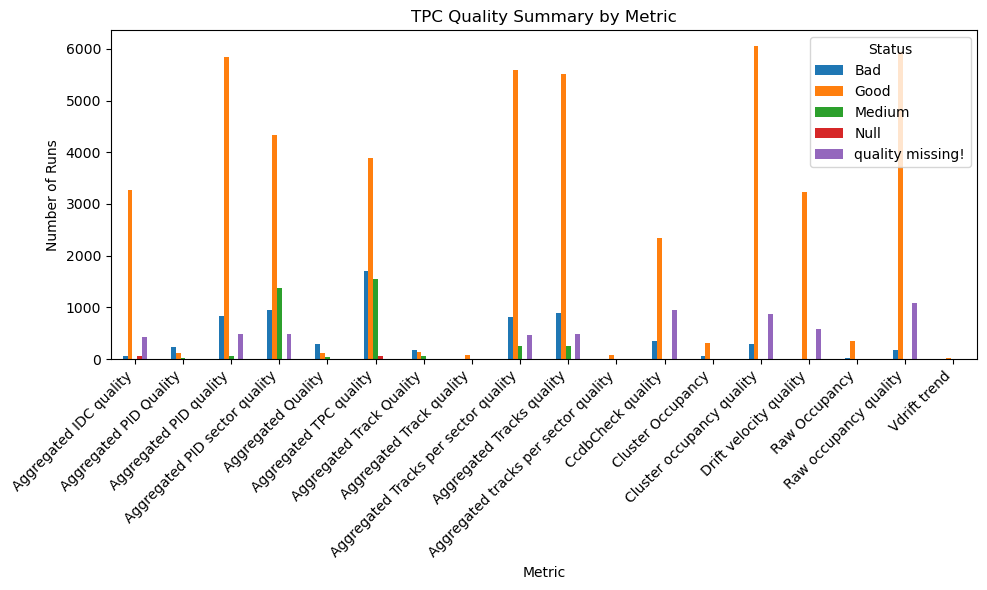

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Pivot for easy grouped bars
pivot = df.pivot(index="Metric", columns="Status", values="Count").fillna(0)

pivot.plot(kind="bar", stacked=False, figsize=(10,6))
plt.ylabel("Number of Runs")
plt.title("TPC Quality Summary by Metric")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
print(df["Metric" == ""])

                                  Metric            Status  Count
0                     Aggregated Quality               Bad    294
1                     Aggregated Quality              Null      2
2                     Aggregated Quality            Medium     43
3                     Aggregated Quality              Good    122
4                     Aggregated Quality  quality missing!      1
..                                   ...               ...    ...
60  Aggregated Tracks per sector quality  quality missing!    476
61  Aggregated Tracks per sector quality            Medium    246
62                     CcdbCheck quality              Good   2334
63                     CcdbCheck quality  quality missing!    947
64                     CcdbCheck quality               Bad    354

[65 rows x 3 columns]
